In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
tf.keras.datasets

<module 'tensorflow.keras.datasets' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/__init__.py'>

In [ ]:
mnist_data = tf.keras.datasets.mnist

In [ ]:
mnist_data

<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>

In [ ]:
# tf.keras.datasets.(데이터명).load_data()는 학습/테스트 셋을 각각 호출해줌
(x_train, y_train), (x_test, y_test) = mnist_data.load_data()

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

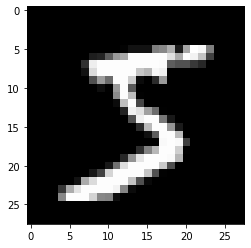

In [ ]:
plt.imshow(x_train[0], cmap='gray') # color map

In [ ]:
x_test_flatten = x_test.reshape([10000, 784])
x_test_flatten = x_test.reshape([x_test.shape[0], -1]) #- 1은 나머지 다라는 의미

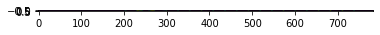

In [ ]:
plt.imshow(x_test_flatten[0].reshape([1, 784]))

In [ ]:
import os

In [ ]:
os.listdir('./')

['.config', 'sample_weight.pkl', 'sample_data']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pickle
# 압축 관련 패키지! 딕셔너리 형태를 저장할 때 좋은 피클

In [44]:
# rb -> 읽기 모드
with open('sample_weight.pkl', 'rb') as f:
  network = pickle.load(f)

In [45]:
network['W1'].shape, network['W2'].shape, network['W3'].shape

((784, 50), (50, 100), (100, 10))

In [46]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [47]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [48]:
x = x_test_flatten

In [49]:
import numpy as np

# input 정의

# 가중치 정의, 편향 정의

W1, W2, W3 = network['W1'], network['W2'], network['W3']
b1, b2, b3 = network['b1'], network['b2'], network['b3']


#input -> 1층
a1 = np.dot(x, W1) + b1
z1 = sigmoid(a1)

# 1층 -> 2층
a2 = np.dot(z1, W2) + b2
z2 = sigmoid(a2)

# 2층 -> 3층
a3 = np.dot(z2, W3) + b3

# 3층 -> 마지막 활성함수 통과
# 항등함수 or softmax 함수

y = softmax(a3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [50]:
y[0]

array([1.8234791e-09, 1.9446912e-10, 7.8615038e-08, 3.5553963e-08,
       6.4149401e-11, 2.6868985e-10, 1.9469331e-13, 4.2491962e-04,
       1.6188402e-10, 2.2574166e-07], dtype=float32)